In [13]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from scipy.stats import uniform
%matplotlib inline  
pylab.rc('font',**{'family':'verdana'})  # Поддержка русскоязычных надписей.

<h2>Исследование оценок</h2>

In [21]:
# Строит графики зависимости модуля разности оценок и параметра theta
# от размера подвыборки.
def showEstimations(theta, ylimit) :
    maxSize = 10000

    # Подготавливаем списки для всех оценок.
    doubleMean = np.array([])  # 2 * выборочное среднее.
    meanPlusN = np.array([])  # Среднее + (n-ая порядковая статистика) / 2
    firstStat = np.array([])  # (n + 1) на первую статистику
    firstLast = np.array([])  # Сумма первой и n-ой порядковых статистик
    lastStat = np.array([])  # (n + 1)/n * (n-ая статистика)
    grid = np.array([])  # Сетка чисел 1..N

    # Генерируем выборку.
    sample = uniform.rvs(scale=theta, size=maxSize)

    # Для каждого n <= N считаем значение всех оценок на выборке x[0]..x[n]
    for i in range(1, maxSize):
        grid = np.append(grid, i)
        doubleMean = np.append(doubleMean, abs(2 * sample[:i].mean() - theta))
        meanPlusN = np.append(meanPlusN, abs(sample[:i].mean() + np.amax(sample[:i]) / 2 - theta))
        firstStat = np.append(firstStat, abs((i + 1) * np.amin(sample[:i]) - theta))
        firstLast = np.append(firstLast, abs(np.amax(sample[:i]) + np.amin(sample[:i]) - theta))
        lastStat = np.append(lastStat, abs(((i + 1) / (i)) * np.amax(sample[:i]) - theta))

    # Строим графики зависимости всех оценок от n.
    plt.figure(figsize=(16, 8))
    plt.plot(grid, doubleMean, color='green', label=r'$\overline{X}$')
    plt.plot(grid, firstStat, color='yellow', label=r'$(n+1)X_{(1)}$')
    plt.plot(grid, meanPlusN, color='red', label=r'$\overline{X} + X_{(n)}/2$')
    plt.plot(grid, firstLast, color='purple', label=r'$X_{(n)} + X_{(1)}}$')
    plt.plot(grid, lastStat, color='blue', label=r'$\frac{n+1}{n}X_{(n)}$')
    
    plt.ylim(0, ylimit)
    plt.title(u"График зависимости модуля разности \
              оценок и параметра theta=" 
              + str(theta) + " от размера подвыборки")
    plt.xlabel(u"Размер подвыборки")
    plt.ylabel(u"Модуль разности оценки и параметра")
    plt.legend()
    
    plt.show()

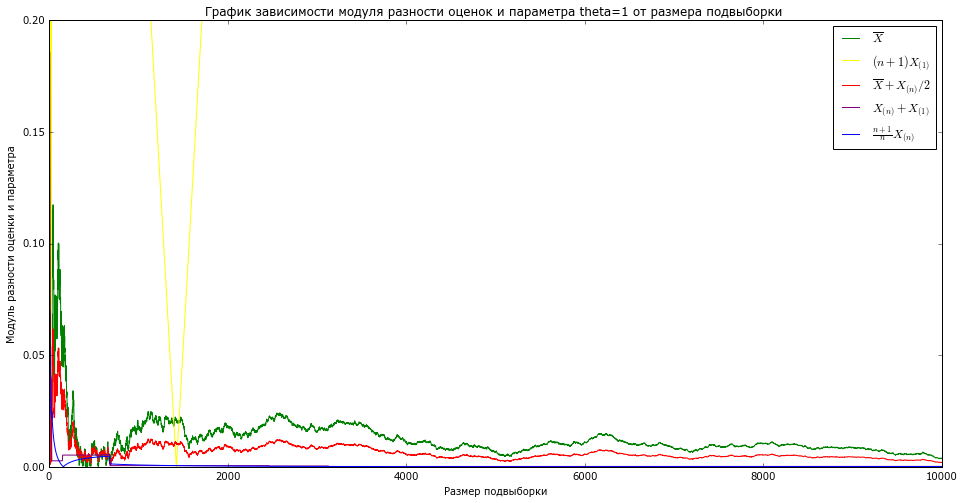

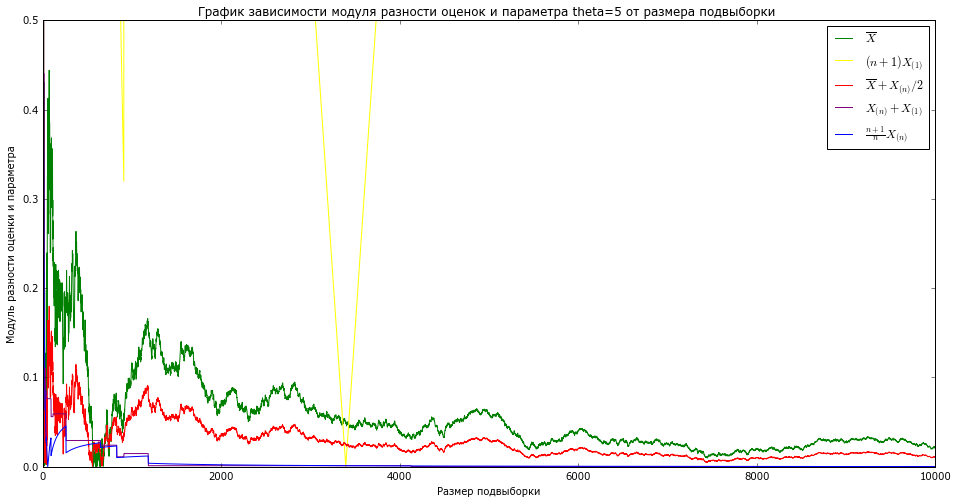

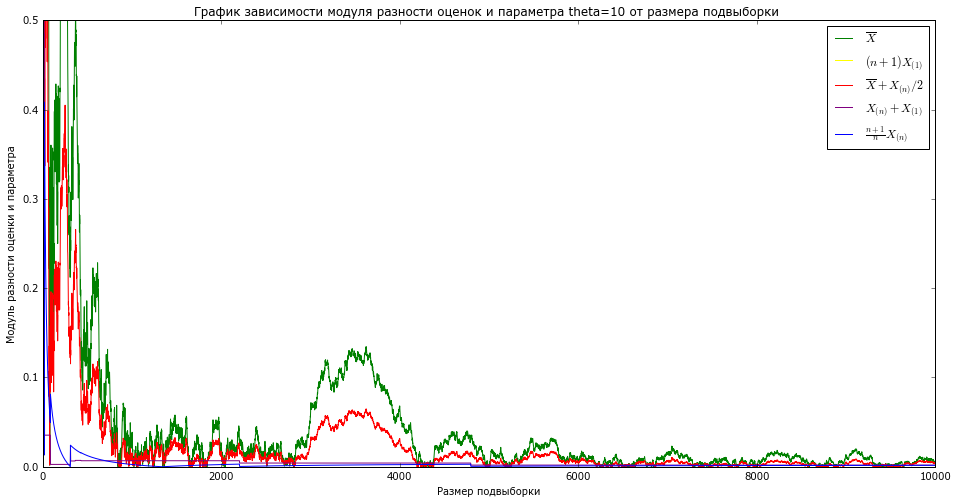

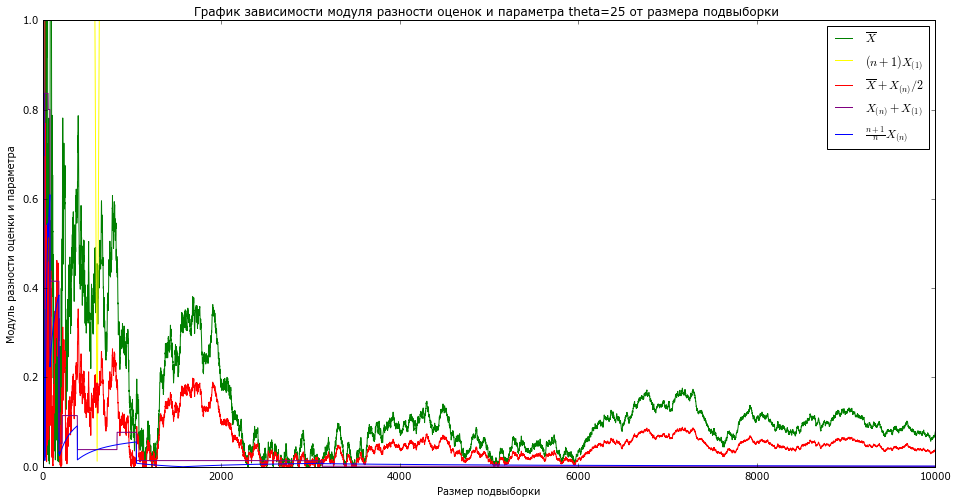

In [22]:
showEstimations(1, .2)
showEstimations(5, .5)
showEstimations(10, .5)
showEstimations(25, 1)

<h2>Выводы:</h2>

Лучше всего параметр оценивают оценки $X_{(n)} + X_{(1)}$ и $\frac{n+1}{n}X_{(n)}$<br>
Хуже всех - несостоятельная оценка $(n+1)X_{(1)}$